In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re 
import ntpath
import sys 
sys.path.append(r'../.')
from commons.data_processing import *
from commons.my_mzml import *

In [2]:
xml_files = get_files(r'E:\Research\MS Data\QE-HF\20201115_NT1T10Glyco', exts=['.mzXML'])
xml_files = [f for f in xml_files if re.search('EnrGly', f)]

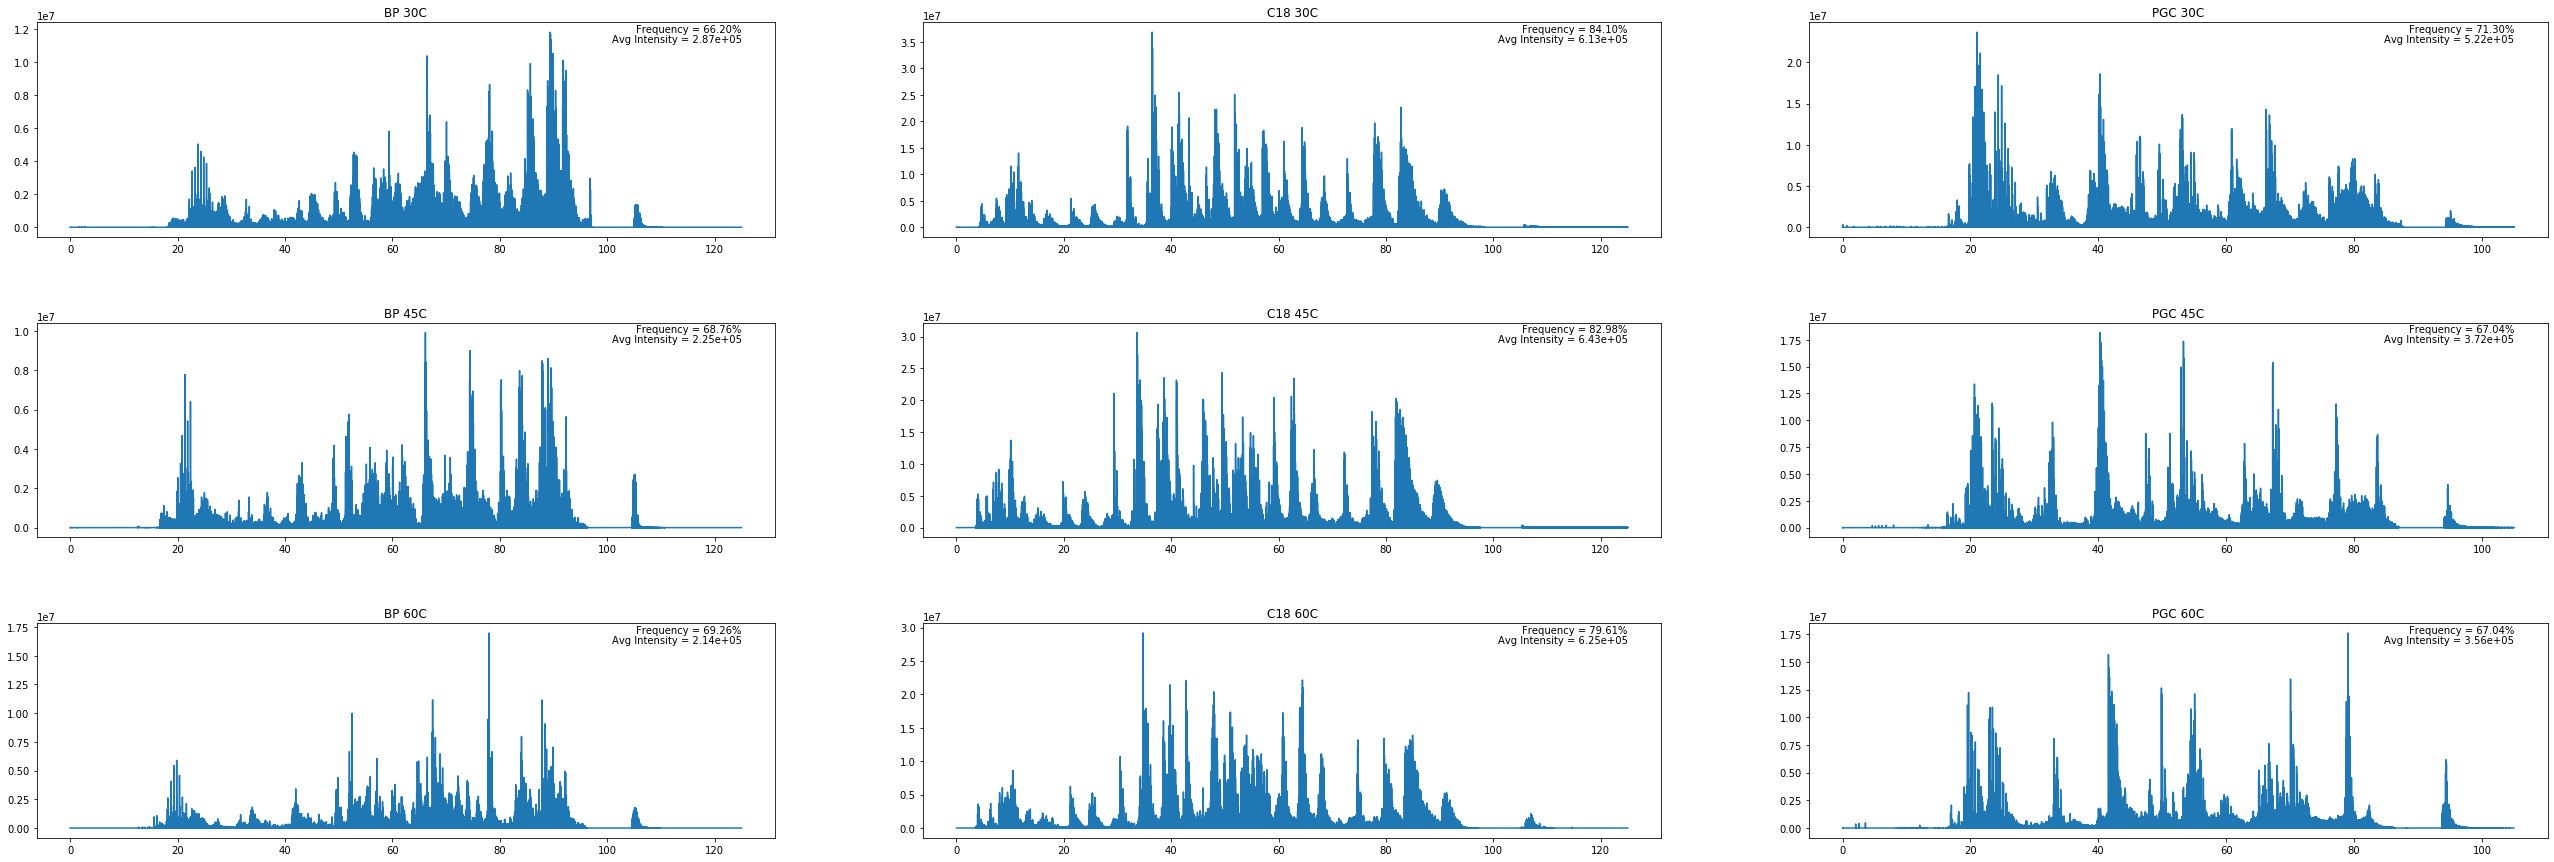

In [72]:
fig, axs = plt.subplots(len(xml_files) // 3, 3, figsize=(45, 15))
plt.subplots_adjust(hspace=0.4)
for i, file in enumerate(xml_files):
    title, _ = ntpath.splitext(ntpath.basename(file))
    title = title.split('_')[-3:-1]
    title = ' '.join(title)

    # grab ax
    ax = axs[i % 3][i // 3]
    # times and intensity of Ox ion appearance
    m = mzXML(file)
    xs, ys, count = m.ms2_search(204.09, frequency=True)
    ax.plot(xs, ys)
    ax.set_title(title)
    # calculate frequency
    freq = len(np.where(ys > 0)[0]) / count
    ax.text(max(xs), max(ys), f'Frequency = {freq:.2%}', ha='right')
    # find average intensity of all scans with Ox ions
    nons = np.where(ys > 0)
    ax.text(max(xs), max(ys)*0.95, f'Avg Intensity = {np.mean(ys[nons]):.2e}', ha='right')
